In [5]:
# =============================
# Q1 Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# =============================
import pandas as pd
df = pd.read_csv("/content/BIKE DETAILS.csv")   # adjust file name if needed
print(df.head(10))
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [10]:
# =============================
# Q2 Check for missing values in all columns and describe your approach for handling them.
# =============================
print(df.isnull().sum())
df['seller_type'] = df['seller_type'].fillna(df['seller_type'].mode()[0])
df['km_driven'] = df['km_driven'].fillna(df['km_driven'].median())
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


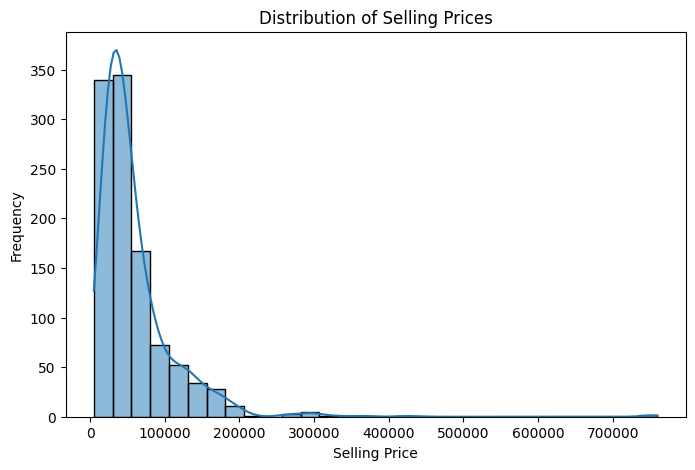

In [11]:
# =============================
# Q3 Plot the distribution of selling prices using a histogram and describe the overall trend.
# =============================
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


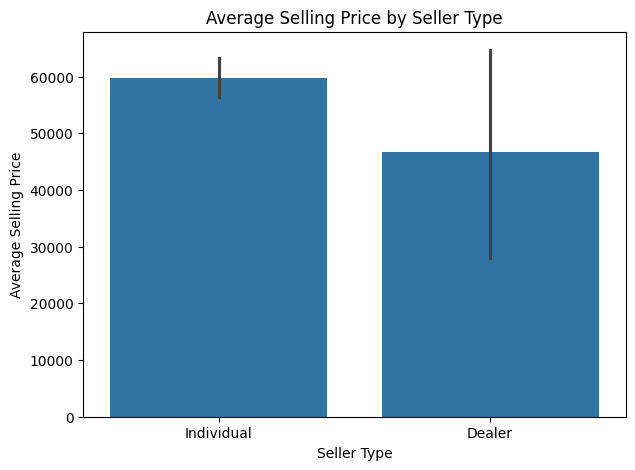

In [12]:
# =============================
# Q4 Create a bar plot to visualize the average selling price for each seller_type and write one observation.
# =============================
plt.figure(figsize=(7,5))
sns.barplot(x='seller_type', y='selling_price', data=df)
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()


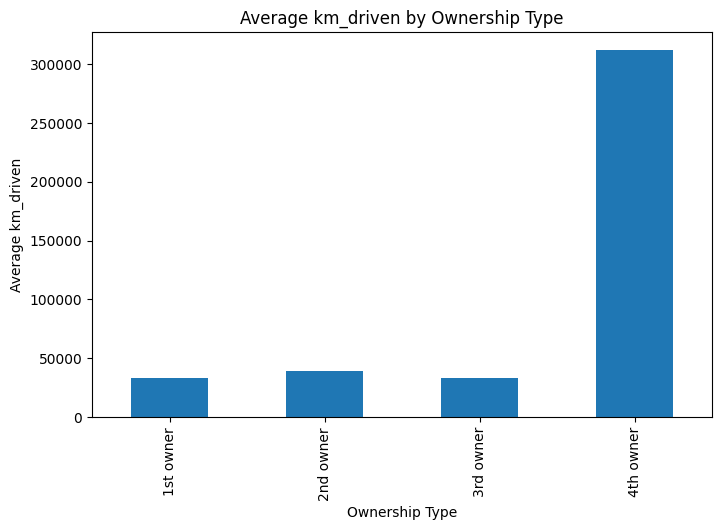

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [13]:
# =============================
# Q5 Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
# =============================
avg_km = df.groupby('owner')['km_driven'].mean()

plt.figure(figsize=(8,5))
avg_km.plot(kind='bar')
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.show()

print(avg_km)


In [14]:
# =============================
# Q6 Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
# =============================
print("Before removing outliers:")
print(df['km_driven'].describe())
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
print("\nAfter removing outliers:")
print(df['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


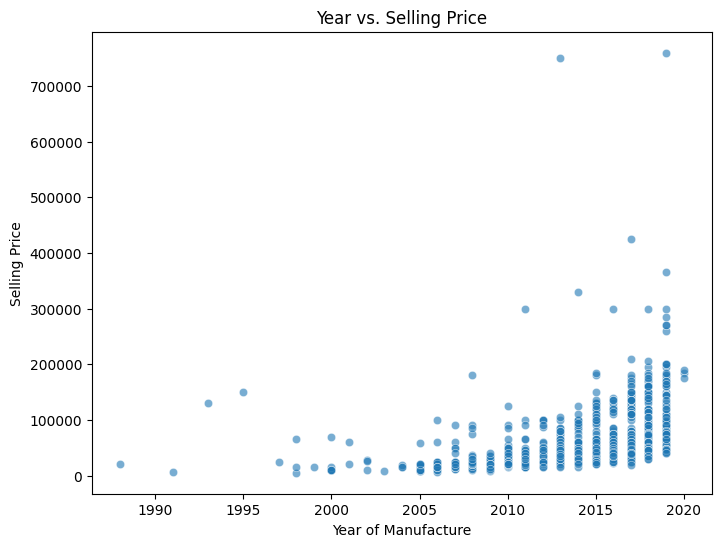

In [15]:
# =============================
# Q7 Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
# =============================
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6)
plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


In [16]:
# =============================
# Q8 Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
# =============================
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
print(df_encoded.head(5))


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350            72752.5                    True  
1       5650            72752.5                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000            72752.5                    True  


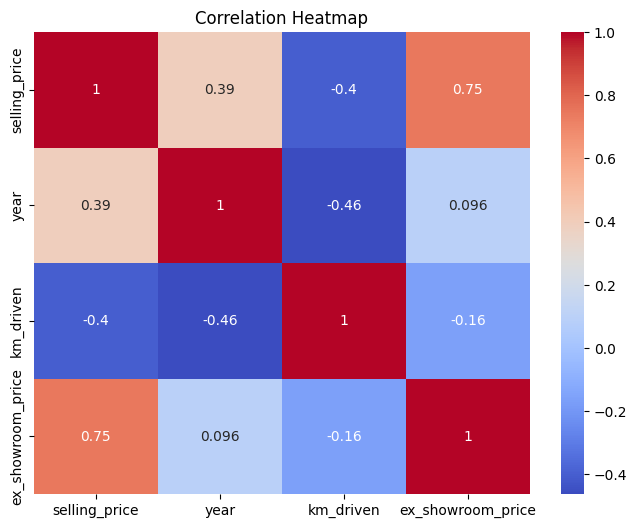

In [18]:
# =============================
# Q9 Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
# =============================
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [19]:
# Summary Findings
print("Key Factors affecting selling price:")
print("- Newer bikes (year) have higher prices")
print("- Higher km_driven reduces price")
print("- Seller type (dealers) affects price positively")
print("- First-owner bikes valued higher")

print("\nData Cleaning & Feature Engineering:")
print("- Missing values handled (mode/median)")
print("- Outliers removed from km_driven using IQR")
print("- Seller type converted to numeric using one-hot encoding")


Key Factors affecting selling price:
- Newer bikes (year) have higher prices
- Higher km_driven reduces price
- Seller type (dealers) affects price positively
- First-owner bikes valued higher

Data Cleaning & Feature Engineering:
- Missing values handled (mode/median)
- Outliers removed from km_driven using IQR
- Seller type converted to numeric using one-hot encoding
